In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("../final_cluster.xlsx")
df.head(3)

,Unnamed: 0.1,Unnamed: 0,master_order_id,master_order_status,created,order_id,order_status,ordereditem_quantity,prod_names,ordereditem_unit_price_net,...,created_year,created_month,created_hour,created_year_month,created_dayofweek,MonetaryValue,Frequency,Recency,Lifetime,CreditScore
0,0,1,25651,delivered,2017-12-18 10:41:00,25651,delivered,5,ProdName1,43.00,...,2017,12,10,2017_12,0,127477.66,77,2.552083,352.322917,01. Excellent
1,1,2,25651,delivered,2017-12-18 10:41:00,25651,delivered,5,ProdName2,35.54,...,2017,12,10,2017_12,0,127477.66,77,2.552083,352.322917,01. Excellent
2,2,143,25684,processed,2018-01-23 06:30:00,25688,processed,2,ProdName118,48.29,...,2018,1,6,2018_01,1,127477.66,77,2.552083,352.322917,01. Excellent


In [4]:
# missing values
df.isnull().sum()

Unnamed: 0.1                    0
Unnamed: 0                      0
master_order_id                 0
master_order_status             0
created                         0
order_id                        0
order_status                    0
ordereditem_quantity            0
prod_names                      0
ordereditem_unit_price_net      0
ordereditem_product_id        161
value                           0
group                           0
dist_names                      0
retailer_names                  0
bill_amount                     0
dummy_name                      0
dummy_group                     0
invoice_id                      0
created_year                    0
created_month                   0
created_hour                    0
created_year_month              0
created_dayofweek               0
MonetaryValue                   0
Frequency                       0
Recency                         0
Lifetime                        0
CreditScore                     0
dtype: int64

In [3]:
# drop columns
df_2 = df.drop(['Unnamed: 0.1','Unnamed: 0','MonetaryValue', 'Frequency','Recency','Lifetime','ordereditem_product_id'], axis=1)

In [6]:
df_2.describe()

,master_order_id,order_id,ordereditem_quantity,ordereditem_unit_price_net,value,bill_amount,dummy_name,dummy_group,invoice_id,created_year,created_month,created_hour,created_dayofweek
count,18468.000000,18468.000000,18468.000000,18468.000000,18468.000000,18468.000000,18468.000000,18468.000000,1.846800e+04,18468.000000,18468.000000,18468.000000,18468.000000
mean,26861.599524,27831.514782,3.317468,93.104943,217.026766,1877.670375,112.763537,1.873728,1.314343e+08,2017.995343,3.690817,7.524258,2.894412
std,695.451537,1252.620684,5.755208,128.952258,290.146693,1848.454522,68.901314,0.369370,9.430143e+07,0.068083,2.542992,3.727085,1.890833
min,25651.000000,25651.000000,1.000000,1.570000,2.810000,4.320000,0.000000,0.000000,2.662600e+04,2017.000000,1.000000,0.000000,0.000000
25%,26268.000000,26752.000000,1.000000,36.605000,80.710000,639.340000,31.000000,2.000000,2.272780e+07,2018.000000,2.000000,5.000000,1.000000
50%,26834.000000,27889.000000,2.000000,67.140000,140.400000,1256.450000,141.000000,2.000000,2.110268e+08,2018.000000,3.000000,6.000000,3.000000
75%,27473.000000,28943.000000,3.000000,107.150000,253.602500,2524.600000,169.000000,2.000000,2.161279e+08,2018.000000,3.000000,8.000000,4.000000
max,28068.000000,29913.000000,500.000000,4285.710000,11560.000000,16559.790000,214.000000,2.000000,2.214275e+08,2018.000000,12.000000,20.000000,6.000000


In [ ]:
# quick way to separate numeric columns 
df_2.describe().columns

In [5]:
# look at numeric and categorical values separately 
df_num = df_2[['ordereditem_quantity',
       'ordereditem_unit_price_net', 'value',
       'bill_amount']]
df_cat = df_2[['created','master_order_status','order_status','prod_names','group','dist_names','retailer_names',
               'CreditScore','created_year', 'created_month', 'created_hour', 'created_dayofweek','created_year_month','invoice_id']]

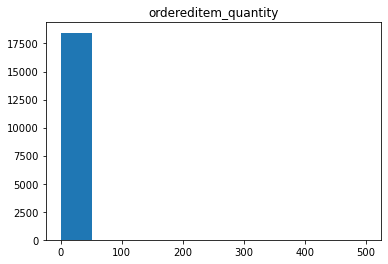

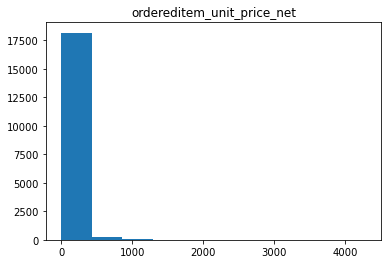

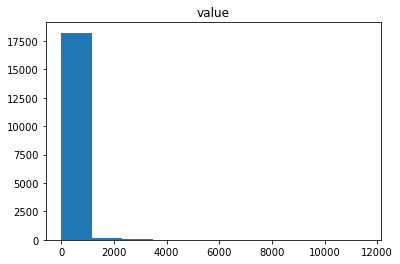

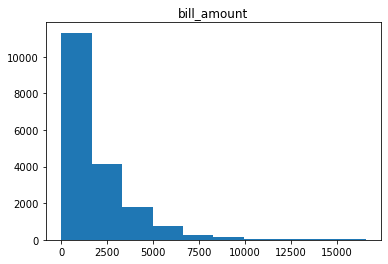

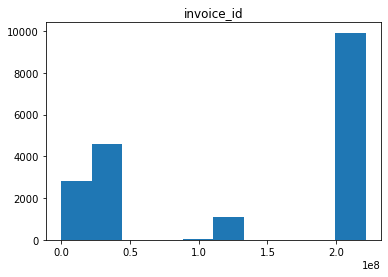

In [15]:
# How is the distribution for numerical values
# Histograms and boxplots
#distributions for all numeric variables (df_num) --histogram
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [ ]:
#distributions for all numeric variables (df_num) --boxplot
for i in df_num.columns:
    plt.boxplot(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

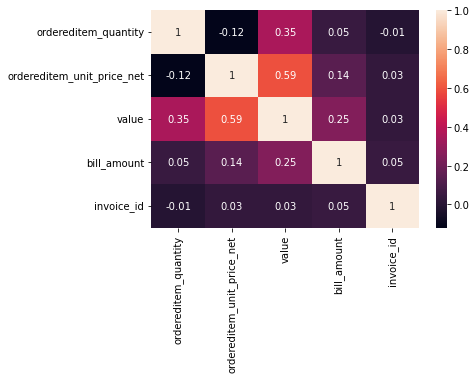

In [16]:
correlation_matrix = df_num.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [24]:
# compare credit score across mean of numerical variables
pd.pivot_table(df_2, index = 'CreditScore', values = ['value','ordereditem_quantity','bill_amount','ordereditem_unit_price_net'],aggfunc= 'median')

,bill_amount,ordereditem_quantity,ordereditem_unit_price_net,value
CreditScore,,,,
01. Excellent,1262.010,2.0,67.96,142.825
02. Good,1242.090,2.0,61.64,127.140
03. Moderate,1353.090,2.0,68.13,140.360
04. Fair,888.055,2.0,52.50,144.455
05. Poor,308.500,6.5,23.16,84.355


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


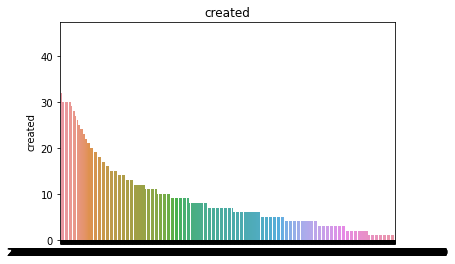

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


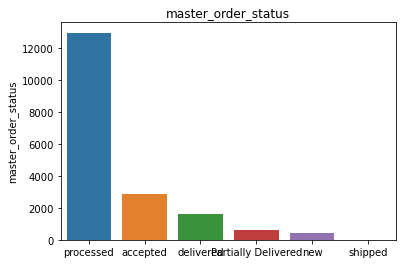

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


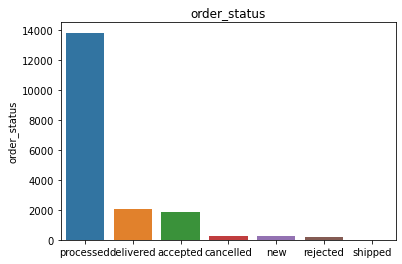

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


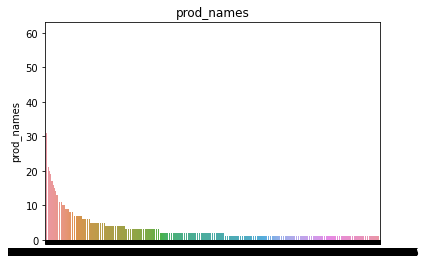

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


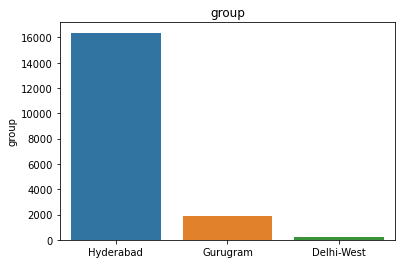

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


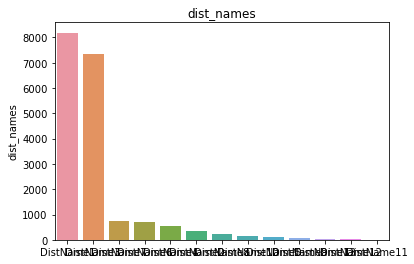

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


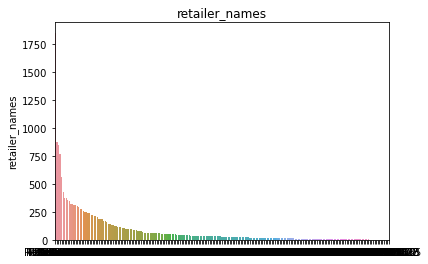

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


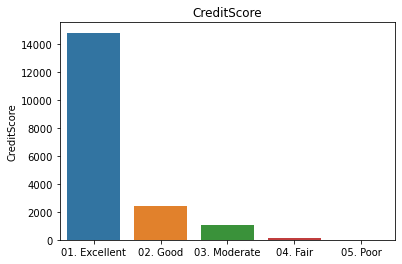

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


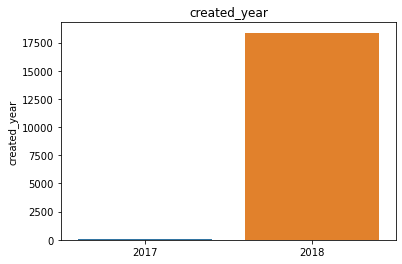

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


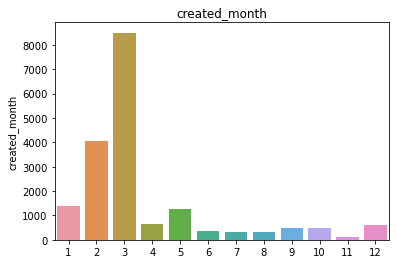

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


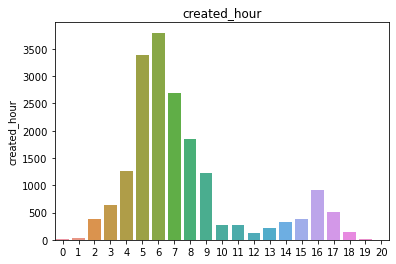

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


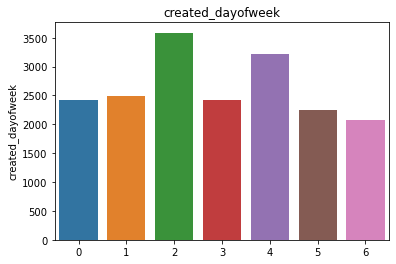

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


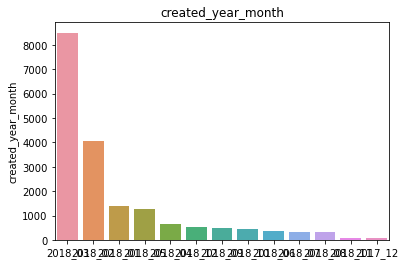

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


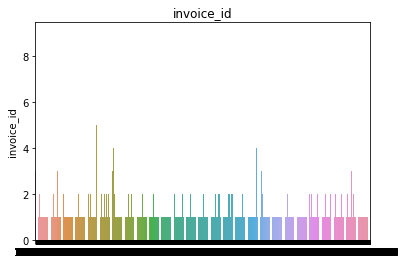

In [19]:
# Distribution for categorical variable
# Bar plot
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [20]:
# Comparing survival and each of these categorical variables (mcm Excel)
# index = row, values = brpa org yg kita kira pakai column yg xde missing values
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'master_order_status' , values = 'created', aggfunc ='count'))
print()
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'order_status', values = 'created' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'prod_names', values = 'created' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'group', values = 'created' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'dist_names', values = 'created' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'retailer_names', values = 'created' ,aggfunc ='count'))
#pd.pivot_table(df_2, index = 'CreditScore', values = ['value','ordereditem_quantity','bill_amount'])

master_order_status  Partially Delivered  accepted  delivered    new  \
CreditScore                                                            
01. Excellent                      459.0    2295.0     1299.0  320.0   
02. Good                            93.0     383.0      193.0   60.0   
03. Moderate                        33.0     180.0       84.0   25.0   
04. Fair                             9.0      27.0       26.0    6.0   
05. Poor                             1.0       NaN        1.0    NaN   

master_order_status  processed  shipped  
CreditScore                              
01. Excellent          10411.0     14.0  
02. Good                1692.0      2.0  
03. Moderate             762.0      1.0  
04. Fair                  92.0      NaN  
05. Poor                   NaN      NaN  

order_status   accepted  cancelled  delivered    new  processed  rejected  \
CreditScore                                                                 
01. Excellent    1471.0      205.0     1673.0 

In [21]:
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'created_year', values = 'created' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'created_month', values = 'created' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'created_dayofweek', values = 'created' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'invoice_id', values = 'created' ,aggfunc ='count'))



created_year   2017     2018
CreditScore                 
01. Excellent  71.0  14727.0
02. Good        8.0   2415.0
03. Moderate    7.0   1078.0
04. Fair        NaN    160.0
05. Poor        NaN      2.0

created_month      1       2       3      4       5      6      7      8   \
CreditScore                                                                 
01. Excellent  1107.0  3242.0  6777.0  538.0  1009.0  288.0  267.0  244.0   
02. Good        186.0   554.0  1092.0   55.0   148.0   43.0   37.0   37.0   
03. Moderate     81.0   227.0   553.0   31.0    81.0   15.0   19.0   24.0   
04. Fair          6.0    32.0    73.0    8.0    18.0    5.0    1.0    4.0   
05. Poor          NaN     NaN     NaN    NaN     NaN    NaN    NaN    NaN   

created_month     9      10    11     12  
CreditScore                               
01. Excellent  388.0  360.0  83.0  495.0  
02. Good        64.0   74.0   9.0  124.0  
03. Moderate    19.0   24.0   4.0    7.0  
04. Fair         5.0    7.0   NaN    1.0 

In [27]:
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'master_order_id', values = 'created' ,aggfunc ='count'))

master_order_id  25651  25652  25653  25654  25655  25656  25657  25658  \
CreditScore                                                               
01. Excellent      3.0    4.0   12.0    5.0    7.0    1.0    3.0    2.0   
02. Good           2.0    NaN    2.0    NaN    NaN    NaN    1.0    1.0   
03. Moderate       1.0    NaN    NaN    1.0    NaN    NaN    NaN    NaN   
04. Fair           NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
05. Poor           NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

master_order_id  25659  25660  ...  28059  28060  28061  28062  28063  28064  \
CreditScore                    ...                                             
01. Excellent      4.0    3.0  ...    5.0    4.0    2.0    9.0    1.0    4.0   
02. Good           NaN    1.0  ...    NaN    1.0    NaN    NaN    NaN    NaN   
03. Moderate       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
04. Fair           NaN    NaN  ...    NaN    1.0    NaN    NaN    NaN    N

In [45]:
df_2[df_2.master_order_id <  28000].pivot_table(index = 'CreditScore', columns = 'order_id', values = 'created' ,aggfunc ='count')

order_id,25651,25652,25653,25654,25655,25656,25657,25658,25659,25660,...,29787,29788,29789,29790,29791,29792,29793,29794,29802,29803
CreditScore,,,,,,,,,,,,,,,,,,,,,
01. Excellent,3.0,4.0,12.0,5.0,7.0,1.0,3.0,2.0,4.0,3.0,...,1.0,9.0,8.0,7.0,4.0,2.0,2.0,2.0,8.0,2.0
02. Good,2.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,...,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN
03. Moderate,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
04. Fair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
05. Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_2.master_order_id.describe()

count    18468.000000
mean     26861.599524
std        695.451537
min      25651.000000
25%      26268.000000
50%      26834.000000
75%      27473.000000
max      28068.000000
Name: master_order_id, dtype: float64

In [38]:
# proportion of retailers performing transactions from all locations
df_2.pivot_table(index=["CreditScore","group"], 
                                              values=["retailer_names"], 
                                              aggfunc={ "retailer_names": pd.Series.nunique})

retailer_names
CreditScore   group                     
01. Excellent Delhi-West              45
              Gurugram                55
              Hyderabad               55
02. Good      Delhi-West              16
              Gurugram                47
              Hyderabad               74
03. Moderate  Delhi-West               8
              Gurugram                28
              Hyderabad               48
04. Fair      Delhi-West               4
              Gurugram                17
              Hyderabad               33
05. Poor      Gurugram                 2

In [54]:
print(pd.pivot_table(df_2, index = 'CreditScore', columns = 'created_year_month', values = 'created' ,aggfunc ='count'))


created_year_month  2017_12  2018_01  2018_02  2018_03  2018_04  2018_05  \
CreditScore                                                                
01. Excellent          71.0   1107.0   3242.0   6777.0    538.0   1009.0   
02. Good                8.0    186.0    554.0   1092.0     55.0    148.0   
03. Moderate            7.0     81.0    227.0    553.0     31.0     81.0   
04. Fair                NaN      6.0     32.0     73.0      8.0     18.0   
05. Poor                NaN      NaN      NaN      NaN      NaN      NaN   

created_year_month  2018_06  2018_07  2018_08  2018_09  2018_10  2018_11  \
CreditScore                                                                
01. Excellent         288.0    267.0    244.0    388.0    360.0     83.0   
02. Good               43.0     37.0     37.0     64.0     74.0      9.0   
03. Moderate           15.0     19.0     24.0     19.0     24.0      4.0   
04. Fair                5.0      1.0      4.0      5.0      7.0      NaN   
05. Poor   

### Data Pre-processing

#### Include only relevant variables (Since we have limited data, I wanted to exclude things like retailer name and order ID so that we could have a reasonable number of features for our models to deal with)

In [46]:
df_2.columns

Index(['master_order_id', 'master_order_status', 'created', 'order_id',
       'order_status', 'ordereditem_quantity', 'prod_names',
       'ordereditem_unit_price_net', 'value', 'group', 'dist_names',
       'retailer_names', 'bill_amount', 'dummy_name', 'dummy_group',
       'invoice_id', 'created_year', 'created_month', 'created_hour',
       'created_year_month', 'created_dayofweek', 'CreditScore'],
      dtype='object')

#### Normalize numerical variables

In [4]:
import numpy as np

In [5]:
df_2['norm_value'] = np.log(df_2.value)

In [6]:
df_2['norm_ordereditem_quantity'] = np.log(df_2.ordereditem_quantity)

<AxesSubplot:>

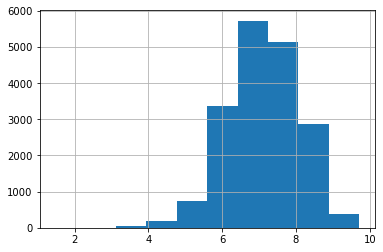

In [7]:
df_2['norm_bill_amount'] = np.log(df_2.bill_amount)
df_2['norm_bill_amount'].hist()

<AxesSubplot:>

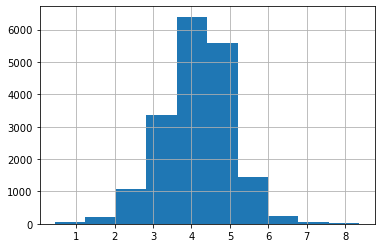

In [8]:
df_2['norm_ordereditem_unit_price_net'] = np.log(df_2.ordereditem_unit_price_net)
df_2['norm_ordereditem_unit_price_net'].hist()

In [9]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(df_2[[ 'master_order_status','order_status', 'norm_ordereditem_quantity',
                                   'norm_ordereditem_unit_price_net', 'group', 'dist_names', 'norm_bill_amount']])

In [10]:
X = all_dummies
X.shape

(18468, 32)

#### Scale data

In [11]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['norm_ordereditem_quantity','norm_bill_amount','norm_ordereditem_unit_price_net']]= scale.fit_transform(all_dummies_scaled[['norm_ordereditem_quantity','norm_bill_amount','norm_ordereditem_unit_price_net']])
all_dummies_scaled

X_scaled = all_dummies_scaled

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
y_dummies = le.fit_transform(df_2['CreditScore'])

In [14]:
Y = y_dummies

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [16]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3)

In [17]:
# to calculate cross validation scores
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [53]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.03596288 0.04098995 0.03481625 0.02901354 0.03210832]
0.03457818546824816


In [54]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.64114462 0.6620263  0.64216634 0.65145068 0.62514507]
0.6443866018630298


In [55]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.80897138 0.8062645  0.82591876 0.82514507 0.80618956]
0.8144978540900938


In [56]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.77300851 0.77571539 0.77988395 0.772147   0.772147  ]
0.7745803695243396


In [57]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.80278422 0.8058778  0.81044487 0.81470019 0.80851064]
0.8084635464583136


In [58]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scale,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.79969064 0.79969064 0.79961315 0.8        0.8       ]
0.7997988873281365


In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:46:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:47:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:47:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:47:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:47:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8391338  0.84880124 0.84719536 0.85299807 0.85029014]
0.8476837187593963


In [19]:
from sklearn.tree import DecisionTreeClassifier as DT

In [24]:
# Decision Tree
dt = DT(criterion = 'entropy')
dt.fit(X_train, y_train)

# Prediction on Test Data
preds_test = dt.predict(X_test)
print(pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predictions']))

print('Test Data Accuracy',np.mean(preds_test == y_test)) # Test Data Accuracy 

# Prediction on Train Data
preds_train = dt.predict(X_train)
print(pd.crosstab(y_train, preds_train, rownames = ['Actual'], colnames = ['Predictions']))

print('Train Data Accuracy',np.mean(preds_train == y_train)) # Train Data Accuracy

from datetime import datetime as dt

start = dt.now()
# process stuff
running_secs = (dt.now() - start).microseconds
print(running_secs)

Predictions     0    1    2   3  4
Actual                            
0            3447  687  306  32  0
1             533   94   46   3  1
2             261   46   28   4  0
3              42    7    4   0  0
Test Data Accuracy 0.6441075618119473
Predictions      0     1    2    3  4
Actual                               
0            10326     0    0    0  0
1               10  1736    0    0  0
2                1     0  745    0  0
3                2     0    0  105  0
4                0     0    0    0  2
Train Data Accuracy 0.998994352904773
0


In [25]:
# Random Forest
rf = RandomForestClassifier(n_jobs=2, n_estimators=15, criterion="entropy")

rf.fit(X_train, y_train) # Fitting RandomForestClassifier model from sklearn.ensemble  
# Prediction on Test Data
rfpreds_test = rf.predict(X_test)
print(pd.crosstab(y_test, rfpreds_test, rownames=['Actual'], colnames=['Predictions']))

print('Test Data Accuracy',np.mean(rfpreds_test == y_test)) # Test Data Accuracy 

# Prediction on Train Data
rfpreds_train = rf.predict(X_train)
print(pd.crosstab(y_train, rfpreds_train, rownames = ['Actual'], colnames = ['Predictions']))

print('Train Data Accuracy',np.mean(rfpreds_train == y_train)) # Train Data Accuracy


Predictions     0    1   2  3
Actual                       
0            4236  176  52  8
1             641   25  11  0
2             319   13   3  4
3              51    1   1  0
Test Data Accuracy 0.769536184804187
Predictions      0     1    2   3  4
Actual                              
0            10317     7    1   1  0
1              142  1603    1   0  0
2               68     1  677   0  0
3               17     1    0  89  0
4                0     0    0   0  2
Train Data Accuracy 0.9815115649415951
0


In [26]:
# Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

nbpred = classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(pd.crosstab(y_test, nbpred, rownames=['Actual'],colnames= ['Predictions']))
print('Test Data Accuracy',accuracy_score(y_test, nbpred))

# error on train data
nbpred_train = classifier.predict(X_train)
print(pd.crosstab(y_train, nbpred_train, rownames=['Actual'],colnames= ['Predictions'])) 
print('Train Data Accuracy',accuracy_score(y_train, nbpred_train))

Predictions  0    1   2     3     4
Actual                             
0            7  128  79  1619  2639
1            0   23  15   236   403
2            0   10   9   120   200
3            0    3   2    16    32
Test Data Accuracy 0.009926006136076521
Predictions   0    1    2     3     4
Actual                               
0            14  291  224  3794  6003
1             0   58   31   654  1003
2             0   11   20   272   443
3             0    0    0    41    66
4             0    0    0     0     2
Train Data Accuracy 0.010443258296588535
0


In [27]:
# scale data for SVM
from sklearn import preprocessing
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)

In [28]:
# SVM
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train_scale, y_train)
# Prediction on Test Data
pred_test_rbf = model_rbf.predict(X_test_scale)
print(pd.crosstab(y_test, pred_test_rbf , rownames=['Actual'], colnames=['Predictions']))
print('Test Data Accuracy',np.mean(pred_test_rbf==y_test))# Test Data Accuracy 
# Prediction on Train Data
pred_train_rbf = model_rbf.predict(X_train_scale)
print(pd.crosstab(y_train, pred_train_rbf, rownames = ['Actual'], colnames = ['Predictions']))

print('Train Data Accuracy',np.mean(pred_train_rbf == y_train)) # Train Data Accuracy


Predictions     0  1
Actual              
0            4471  1
1             677  0
2             339  0
3              53  0
Test Data Accuracy 0.8068940624436023
Predictions      0  1
Actual               
0            10325  1
1             1737  9
2              746  0
3              107  0
4                2  0
Train Data Accuracy 0.7994120832366365
0


In [29]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
# Fit
xgb_cl.fit(X_train_scaled, y_train)
# Predict
preds_xgb = xgb_cl.predict(X_test_scaled)
print(pd.crosstab(y_test, preds_xgb, rownames=['Actual'],colnames= ['Predictions']))
print('Test Data Accuracy',accuracy_score(y_test, preds_xgb))
# error on train data
xgbpred_train = xgb_cl.predict(X_train_scaled)
print(pd.crosstab(y_train, xgbpred_train, rownames=['Actual'],colnames= ['Predictions'])) 
print('Train Data Accuracy',accuracy_score(y_train, xgbpred_train))

C:\Users\Acer\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:25:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Predictions     0    1   2  3
Actual                       
0            4428   34  10  0
1             462  212   3  0
2             240   17  82  0
3              46    2   2  3
Test Data Accuracy 0.852734163508392
Predictions      0    1    2   3  4
Actual                             
0            10306   15    5   0  0
1              903  842    1   0  0
2              382   13  351   0  0
3               40    0    1  66  0
4                1    0    0   0  1
Train Data Accuracy 0.8947164848766148


In [3]:
from tabulate import tabulate

In [66]:
info = {'Model': ['Decision Tree', 'Random Forest','Naive Bayes', 'SVM','XGBoost'], 'Train Accuracy Score': [0.99922, 0.982903, 0.019726,0.80026,0.8951032], 'Test Accuracy Score': [0.649882, 0.77116, 0.01624, 0.80454,0.85742]}

In [67]:
print(tabulate(info, headers='keys'))

Model            Train Accuracy Score    Test Accuracy Score
-------------  ----------------------  ---------------------
Decision Tree                0.99922                0.649882
Random Forest                0.982903               0.77116
Naive Bayes                  0.019726               0.01624
SVM                          0.80026                0.80454
XGBoost                      0.895103               0.85742


#### Model chosen: XGBoost

In [23]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)
# Predict
preds_xgb = model.predict(X_test_scaled)
print(pd.crosstab(y_test, preds_xgb, rownames=['Actual'],colnames= ['Predictions']))
print('Test Data Accuracy',accuracy_score(y_test, preds_xgb))
# error on train data
xgbpred_train = model.predict(X_train_scaled)
print(pd.crosstab(y_train, xgbpred_train, rownames=['Actual'],colnames= ['Predictions'])) 
print('Train Data Accuracy',accuracy_score(y_train, xgbpred_train))

C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:39:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Predictions     0    1   2  3
Actual                       
0            4385   31  14  0
1             512  227   6  0
2             221   19  74  0
3              42    5   2  1
4               2    0   0  0
Test Data Accuracy 0.8458761956325573
Predictions      0    1    2   3
Actual                          
0            10354   11    3   0
1              890  785    3   0
2              372   15  384   0
3               55    0    2  53
Train Data Accuracy 0.8954900595652511


In [24]:
# save model 
import pickle
pickl = {'model': model}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [25]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']


In [19]:
# data_in for flask API
list(X_test_scaled.iloc[1,:])

[-1.0829921985897752,
 0.41739645861184566,
 0.7227211297973594,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [26]:
# test predict first row
model.predict(X_test_scaled.iloc[1,:].values.reshape(1,-1))

array([0])